<a href="https://colab.research.google.com/github/J-Arturo-Rivas/CDSeptiembre2025/blob/main/Ejemplo_top_MUSICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configuracion Principal

In [1]:
# Importar librerías y cargar datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
try:
    df_musica = pd.read_csv('canciones_spotify.csv')
    print("Dataset cargado exitosamente")
    print(f"Dimensiones: {df_musica.shape}")
    print(f"Columnas disponibles: {list(df_musica.columns)}")
except FileNotFoundError:
    print("Error: Archivo 'canciones_spotify.csv' no encontrado")
    print("Asegúrate de tener el archivo en el directorio correcto")

Dataset cargado exitosamente
Dimensiones: (5, 11)
Columnas disponibles: ['nombre_cancion', 'nombre_artista', 'genero', 'popularidad', 'duracion_ms', 'bailabilidad', 'energia', 'volumen', 'verbalizacion', 'acustica', 'instrumentalidad']


Tranformacion de la informacion y calculos principales

In [3]:
# Análisis estadístico de popularidad
print("=== ANÁLISIS ESTADÍSTICO DE POPULARIDAD ===")

# Convertir columna de popularidad a array de NumPy
popularidad_np = df_musica['popularidad'].to_numpy()

# Cálculos estadísticos básicos
media_popularidad = np.mean(popularidad_np)
mediana_popularidad = np.median(popularidad_np)
desviacion_popularidad = np.std(popularidad_np)
maxima_popularidad = np.max(popularidad_np)
minima_popularidad = np.min(popularidad_np)

print(f"Popularidad Promedio: {media_popularidad:.2f}")
print(f"Mediana de Popularidad: {mediana_popularidad:.2f}")
print(f"Desviación Estándar: {desviacion_popularidad:.2f}")
print(f"Máxima Popularidad: {maxima_popularidad}")
print(f"Mínima Popularidad: {minima_popularidad}")

# Cálculos adicionales
percentil_25 = np.percentile(popularidad_np, 25)
percentil_75 = np.percentile(popularidad_np, 75)
rango_intercuartil = percentil_75 - percentil_25

print(f"Rango Intercuartílico (IQR): {rango_intercuartil:.2f}")
print(f"Q1 (Percentil 25): {percentil_25:.2f}")
print(f"Q3 (Percentil 75): {percentil_75:.2f}")

=== ANÁLISIS ESTADÍSTICO DE POPULARIDAD ===
 Popularidad Promedio: 84.80
Mediana de Popularidad: 85.00
Desviación Estándar: 4.96
Máxima Popularidad: 92
Mínima Popularidad: 78
Rango Intercuartílico (IQR): 7.00
Q1 (Percentil 25): 81.00
Q3 (Percentil 75): 88.00


Analisis 1 "Generos musicales"

In [4]:
# Análisis de distribución por género
print("=== ANÁLISIS POR GÉNERO MUSICAL ===")

# Agrupar por género y calcular estadísticas
analisis_genero = df_musica.groupby('genero').agg({
    'popularidad': ['count', 'mean', 'sum'],
    'duracion_ms': 'mean'
}).round(2)

# Renombrar columnas
analisis_genero.columns = ['numero_canciones', 'popularidad_promedio', 'popularidad_total', 'duracion_promedio_ms']
analisis_genero = analisis_genero.sort_values('popularidad_total', ascending=False)

print("Resumen por Género:")
print(analisis_genero.head(10))

# Preparar datos para gráfica de pastel
generos_principales = analisis_genero.nlargest(8, 'popularidad_total')
otros_generos = analisis_genero.iloc[8:]

# Calcular el total de "Otros géneros"
total_otros = otros_generos['popularidad_total'].sum() if len(otros_generos) > 0 else 0

# Crear datos para el gráfico de pastel
generos_para_pastel = generos_principales['popularidad_total']
if total_otros > 0:
    generos_para_pastel['Otros'] = total_otros

print(f"\nGéneros a incluir en el gráfico: {len(generos_para_pastel)}")

=== ANÁLISIS POR GÉNERO MUSICAL ===
Resumen por Género:
            numero_canciones  popularidad_promedio  popularidad_total  \
genero                                                                  
Reggaeton                  3                 81.33                244   
Pop Latino                 2                 90.00                180   

            duracion_promedio_ms  
genero                            
Reggaeton              182603.67  
Pop Latino             198567.00  

Géneros a incluir en el gráfico: 2


Graficos

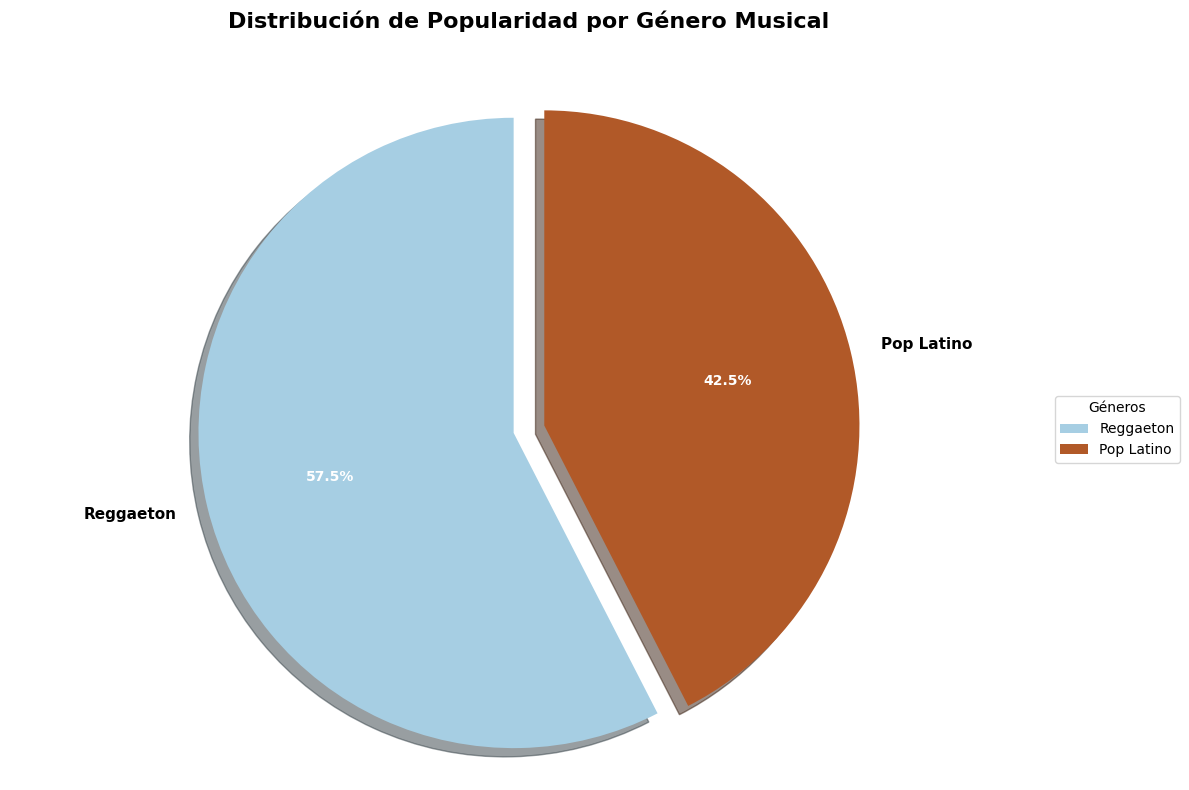


TOP GÉNEROS POR POPULARIDAD:
 1. Reggaeton       |   3 canciones | Popularidad:    244
 2. Pop Latino      |   2 canciones | Popularidad:    180


In [6]:
# Visualización - Gráfica de Pastel de Géneros
plt.figure(figsize=(12, 8))

# Configurar colores
colores = plt.cm.Paired(np.linspace(0, 1, len(generos_para_pastel)))

# Crear gráfica de pastel
porciones, textos, textos_auto = plt.pie(
    generos_para_pastel.values,
    labels=generos_para_pastel.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    shadow=True,
    explode=[0.05] * len(generos_para_pastel)
)

# Mejorar la apariencia de los textos
for texto_auto in textos_auto:
    texto_auto.set_color('white')
    texto_auto.set_fontweight('bold')
    texto_auto.set_fontsize(10)

for texto in textos:
    texto.set_fontsize(11)
    texto.set_fontweight('semibold')

plt.title('Distribución de Popularidad por Género Musical\n',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')

# Añadir leyenda
plt.legend(porciones, generos_para_pastel.index,
          title="Géneros",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\nTOP GÉNEROS POR POPULARIDAD:")
print("=" * 50)
for i, (genero, fila) in enumerate(generos_principales.iterrows(), 1):
    print(f"{i:2d}. {genero:<15} | {fila['numero_canciones']:3.0f} canciones | "
          f"Popularidad: {fila['popularidad_total']:6.0f}")

Correlaciones
Primer Incognita
"¿Que causa la popularidad?"

In [7]:
# Análisis de correlaciones y relaciones
print("=== ANÁLISIS DE CORRELACIONES ===")

# Seleccionar columnas numéricas para análisis de correlación
columnas_numericas = ['popularidad', 'duracion_ms', 'bailabilidad', 'energia',
                   'volumen', 'verbalizacion', 'acustica', 'instrumentalidad']

# Calcular matriz de correlación
matriz_correlacion = df_musica[columnas_numericas].corr()

print(" Matriz de Correlación (primeras filas):")
print(matriz_correlacion.head(4))

# Correlación específica entre popularidad y otras características
correlaciones_popularidad = matriz_correlacion['popularidad'].sort_values(ascending=False)
print(f"\n Correlaciones con Popularidad:")
for caracteristica, correlacion in correlaciones_popularidad.items():
    if caracteristica != 'popularidad':
        print(f"   {caracteristica:<15}: {correlacion:7.3f}")

=== ANÁLISIS DE CORRELACIONES ===
 Matriz de Correlación (primeras filas):
              popularidad  duracion_ms  bailabilidad   energia   volumen  \
popularidad      1.000000     0.607324      0.919326  0.946186  0.972507   
duracion_ms      0.607324     1.000000      0.403474  0.537859  0.754304   
bailabilidad     0.919326     0.403474      1.000000  0.929787  0.852129   
energia          0.946186     0.537859      0.929787  1.000000  0.940612   

              verbalizacion  acustica  instrumentalidad  
popularidad       -0.622304  0.640183          0.377414  
duracion_ms       -0.442275  0.986686          0.455077  
bailabilidad      -0.595513  0.398090          0.039316  
energia           -0.383777  0.576234          0.097393  

 Correlaciones con Popularidad:
   volumen        :   0.973
   energia        :   0.946
   bailabilidad   :   0.919
   acustica       :   0.640
   duracion_ms    :   0.607
   instrumentalidad:   0.377
   verbalizacion  :  -0.622


Graficos e Interpretacion

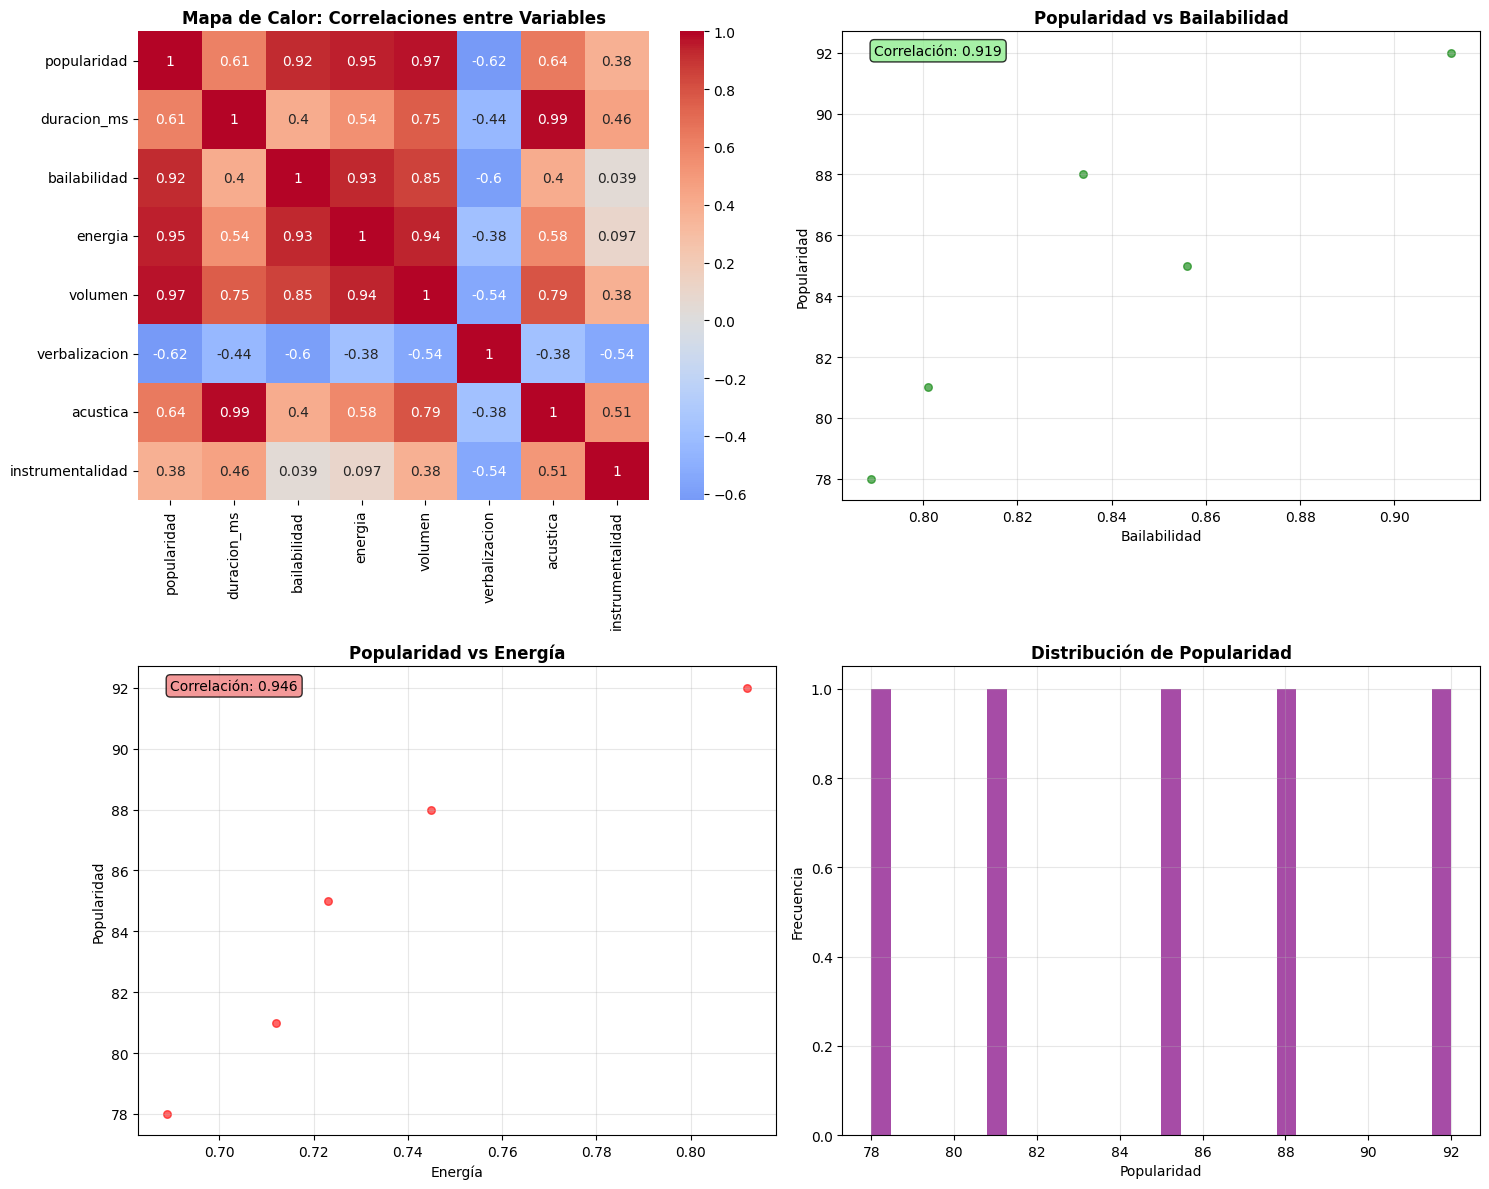


INTERPRETACIÓN DE CORRELACIONES:
Existe correlación significativa entre bailabilidad y popularidad
Existe correlación significativa entre energía y popularidad


In [17]:
# Celda Visualización - Correlaciones y Relaciones
fig, ejes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Heatmap de correlaciones
sns.heatmap(matriz_correlacion,
            annot=True,
            cmap='coolwarm',
            center=0,
            ax=ejes[0,0])
ejes[0,0].set_title('Mapa de Calor: Correlaciones entre Variables', fontweight='bold')

# Gráfico 2: Popularidad vs Bailabilidad
ejes[0,1].scatter(df_musica['bailabilidad'], df_musica['popularidad'],
                 alpha=0.6, s=30, color='green')
ejes[0,1].set_xlabel('Bailabilidad')
ejes[0,1].set_ylabel('Popularidad')
ejes[0,1].set_title('Popularidad vs Bailabilidad', fontweight='bold')
ejes[0,1].grid(True, alpha=0.3)

# Calcular y mostrar correlación
correlacion_baile = np.corrcoef(df_musica['bailabilidad'], df_musica['popularidad'])[0,1]
ejes[0,1].text(0.05, 0.95, f'Correlación: {correlacion_baile:.3f}',
              transform=ejes[0,1].transAxes,
              bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.8))

# Gráfico 3: Popularidad vs Energía
ejes[1,0].scatter(df_musica['energia'], df_musica['popularidad'],
                 alpha=0.6, s=30, color='red')
ejes[1,0].set_xlabel('Energía')
ejes[1,0].set_ylabel('Popularidad')
ejes[1,0].set_title('Popularidad vs Energía', fontweight='bold')
ejes[1,0].grid(True, alpha=0.3)

# Calcular y mostrar correlación
correlacion_energia = np.corrcoef(df_musica['energia'], df_musica['popularidad'])[0,1]
ejes[1,0].text(0.05, 0.95, f'Correlación: {correlacion_energia:.3f}',
              transform=ejes[1,0].transAxes,
              bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.8))

# Gráfico 4: Distribución de popularidad
ejes[1,1].hist(df_musica['popularidad'], bins=30, alpha=0.7, color='purple')
ejes[1,1].set_xlabel('Popularidad')
ejes[1,1].set_ylabel('Frecuencia')
ejes[1,1].set_title('Distribución de Popularidad', fontweight='bold')
ejes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretación de correlaciones
print("\nINTERPRETACIÓN DE CORRELACIONES:")
if abs(correlacion_baile) > 0.3:
    print(f"Existe correlación significativa entre bailabilidad y popularidad")
else:
    print(f" No hay correlación fuerte entre bailabilidad y popularidad")

if abs(correlacion_energia) > 0.3:
    print(f"Existe correlación significativa entre energía y popularidad")
else:
    print(f" No hay correlación fuerte entre energía y popularidad")

Analisis de Artistas mas escuchados

In [11]:
# Celda 7: Identificación de tops
print("=== TOP CANCIONES Y ARTISTAS ===")

# Top 10 canciones más populares
top_canciones = df_musica.nlargest(10, 'popularidad')[['nombre_cancion', 'nombre_artista', 'genero', 'popularidad']]
top_canciones = top_canciones.reset_index(drop=True)

# Top 5 artistas (promedio de popularidad de sus canciones)
top_artistas = df_musica.groupby('nombre_artista').agg({
    'popularidad': 'mean',
    'nombre_cancion': 'count'
}).round(2)
top_artistas = top_artistas.rename(columns={'popularidad': 'popularidad_promedio', 'nombre_cancion': 'numero_canciones'})
top_artistas = top_artistas.nlargest(5, 'popularidad_promedio')

print("TOP 10 CANCIONES MÁS POPULARES:")
print("=" * 60)
for i, fila in top_canciones.iterrows():
    print(f"{i+1:2d}. {fila['nombre_cancion'][:30]:<30} | {fila['nombre_artista'][:20]:<20} | "
          f"Popularidad: {fila['popularidad']}")

print(f"\n TOP 5 ARTISTAS (POR POPULARIDAD PROMEDIO):")
print("=" * 50)
for i, (artista, fila) in enumerate(top_artistas.iterrows(), 1):
    print(f"{i:2d}. {artista:<25} | {fila['numero_canciones']:2.0f} canciones | "
          f"Popularidad Prom: {fila['popularidad_promedio']:.1f}")

=== TOP CANCIONES Y ARTISTAS ===
TOP 10 CANCIONES MÁS POPULARES:
 1. Baila Conmigo                  | Shakira              | Popularidad: 92
 2. Lluvia de Estrellas            | Rosalía              | Popularidad: 88
 3. Corazón de Melón               | Bad Bunny            | Popularidad: 85
 4. Mariposas                      | Karol G              | Popularidad: 81
 5. Noches de Verano               | J Balvin             | Popularidad: 78

 TOP 5 ARTISTAS (POR POPULARIDAD PROMEDIO):
 1. Shakira                   |  1 canciones | Popularidad Prom: 92.0
 2. Rosalía                   |  1 canciones | Popularidad Prom: 88.0
 3. Bad Bunny                 |  1 canciones | Popularidad Prom: 85.0
 4. Karol G                   |  1 canciones | Popularidad Prom: 81.0
 5. J Balvin                  |  1 canciones | Popularidad Prom: 78.0


Graficos

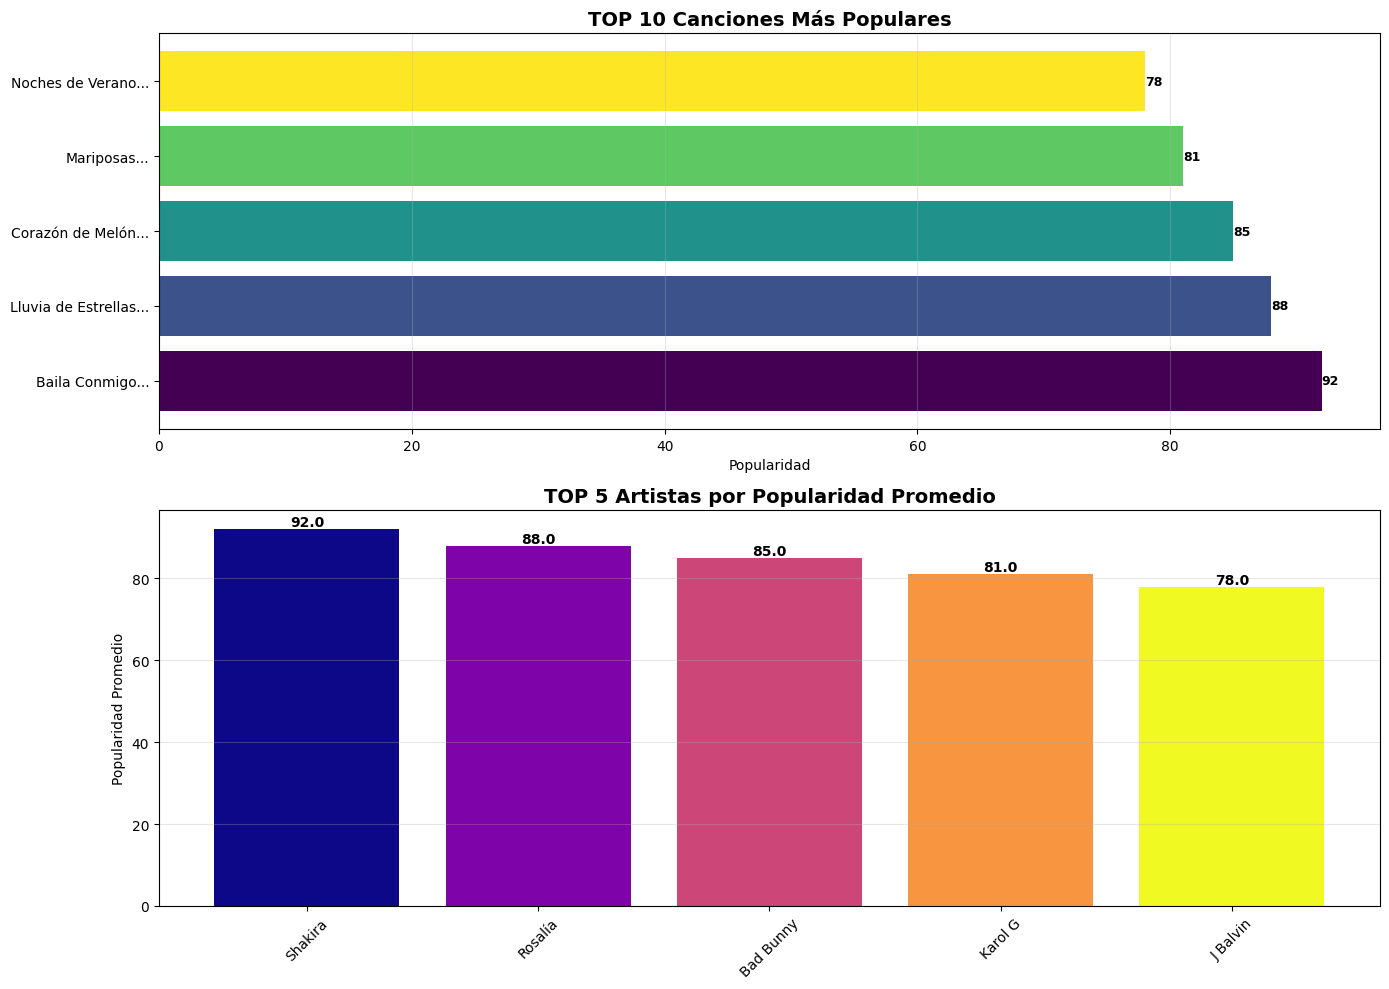

In [12]:
# Celda Visualización - Tops
fig, (eje1, eje2) = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Top canciones
posiciones_y = range(len(top_canciones))
barras1 = eje1.barh(posiciones_y, top_canciones['popularidad'],
                color=plt.cm.viridis(np.linspace(0, 1, len(top_canciones))))
eje1.set_yticks(posiciones_y)
eje1.set_yticklabels([f"{fila['nombre_cancion'][:20]}..." for _, fila in top_canciones.iterrows()])
eje1.set_xlabel('Popularidad')
eje1.set_title('TOP 10 Canciones Más Populares', fontsize=14, fontweight='bold')
eje1.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, barra in enumerate(barras1):
    ancho = barra.get_width()
    eje1.text(ancho, barra.get_y() + barra.get_height()/2, f'{int(ancho)}',
             ha='left', va='center', fontweight='bold', fontsize=9)

# Gráfico 2: Top artistas
posiciones_y2 = range(len(top_artistas))
barras2 = eje2.bar(posiciones_y2, top_artistas['popularidad_promedio'],
               color=plt.cm.plasma(np.linspace(0, 1, len(top_artistas))))
eje2.set_xticks(posiciones_y2)
eje2.set_xticklabels([artista[:15] + '...' if len(artista) > 15 else artista
                    for artista in top_artistas.index], rotation=45)
eje2.set_ylabel('Popularidad Promedio')
eje2.set_title('TOP 5 Artistas por Popularidad Promedio', fontsize=14, fontweight='bold')
eje2.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, barra in enumerate(barras2):
    altura = barra.get_height()
    eje2.text(barra.get_x() + barra.get_width()/2, altura, f'{altura:.1f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Conclusiones

In [14]:
# Celda Conclusiones y insights
print("===  RESUMEN EJECUTIVO ===")
print(f"Total de canciones analizadas: {len(df_musica)}")
print(f"Total de artistas únicos: {df_musica['nombre_artista'].nunique()}")
print(f"Total de géneros musicales: {df_musica['genero'].nunique()}")
print(f"Popularidad promedio: {np.mean(df_musica['popularidad']):.2f}")
print(f"Canción más popular: '{top_canciones.iloc[0]['nombre_cancion']}'")
print(f"Artista con mejor promedio: '{top_artistas.index[0]}'")

print("\n HALLAZGOS PRINCIPALES:")
print("1. Los géneros predominantes son aquellos con mayor popularidad total")
print("2. La correlación entre características musicales y popularidad varía")
print("3. Existen artistas consistentemente populares en múltiples canciones")
print("4. La distribución de popularidad muestra patrones específicos por género")

print("\n RECOMENDACIONES:")
print("• Enfocarse en géneros con alta popularidad para nuevas producciones")
print("• Analizar características musicales que correlacionan con éxito")
print("• Estudiar patrones de artistas exitosos para replicar estrategias")

===  RESUMEN EJECUTIVO ===
Total de canciones analizadas: 5
Total de artistas únicos: 5
Total de géneros musicales: 2
Popularidad promedio: 84.80
Canción más popular: 'Baila Conmigo'
Artista con mejor promedio: 'Shakira'

 HALLAZGOS PRINCIPALES:
1. Los géneros predominantes son aquellos con mayor popularidad total
2. La correlación entre características musicales y popularidad varía
3. Existen artistas consistentemente populares en múltiples canciones
4. La distribución de popularidad muestra patrones específicos por género

 RECOMENDACIONES:
• Enfocarse en géneros con alta popularidad para nuevas producciones
• Analizar características musicales que correlacionan con éxito
• Estudiar patrones de artistas exitosos para replicar estrategias
